# EricSchles/machine_learning

In [3]:
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
df = pd.read_csv("world_height.csv")
df.head()

,Entity,Code,Year,height
0,Afghanistan,AFG,1870,168.4
1,Afghanistan,AFG,1880,165.7
2,Afghanistan,AFG,1930,166.8
3,Albania,ALB,1880,170.1
4,Albania,ALB,1890,169.8


# Exercise 1

1. given the dataset - pick two countries and compare and contrast the heights (which are already averaged) between the different countries

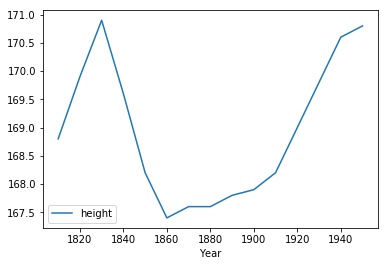

In [5]:
arg = df[df.Code == 'ARG']
arg.plot(x='Year', y='height')

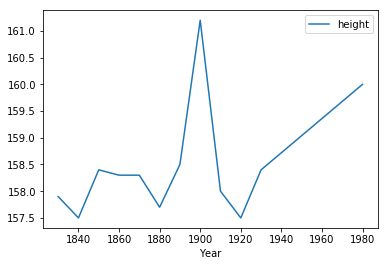

In [6]:
vnm = df[df.Code == 'VNM']
vnm.plot(x='Year', y='height')

## Analysis

### Argentina

In [7]:
print('Period:', arg.Year.min(), '-', arg.Year.max())
print('Years:', arg.Year.values)
print('Mean:', arg.height.mean())
print('Range:', arg.height.max() - arg.height.min())
print('Variance:', arg.height.var())
print('Std deviation:', arg.height.std())
print('Max:', arg.height.max(), 'Year:', arg[arg.height == arg.height.max()].Year.values[0])
print('Min:', arg.height.min(), 'Year:', arg[arg.height == arg.height.min()].Year.values[0])

Period: 1810 - 1950
Years: [1810 1820 1830 1840 1850 1860 1870 1880 1890 1900 1910 1920 1930 1940
 1950]
Mean: 168.94000000000003
Range: 3.5
Variance: 1.5440000000000054
Std deviation: 1.2425779653607276
Max: 170.9 Year: 1830
Min: 167.4 Year: 1860


Because these values are yearly averages, and peoples' average heights don't change significantly year over year (hopefully), high values of range or variance would be undesirable. As demonstrated, these values are relatively low, so the mean can be interpreted as a valid representation of the average height of Argentines between 1820 and 1940. The highest and lowest heights are 170.9 and 167.4 cm recorded in 1830 and 1860 respectively. Argentina achieved independence in 1825, and between 1830 and 1860 fought multiple civil wars before Bartolomé Mitre became the first president of the unified country in 1862. Prolonged internal conflict may have a relationship with the average height.

### Vietnam

In [8]:
print('Period:', vnm.Year.min(), '-', vnm.Year.max())
print('Years:', vnm.Year.values)
print('Mean:', vnm.height.mean())
print('Range:', vnm.height.max() - vnm.height.min())
print('Variance:', vnm.height.var())
print('Std deviation:', vnm.height.std())
print('Max:', vnm.height.max(), 'Year:', vnm[vnm.height == vnm.height.max()].Year.values[0])
print('Min:', vnm.height.min(), 'Year:', vnm[vnm.height == vnm.height.min()].Year.values[0])
print('\n', vnm[vnm.Year == 1980])

Period: 1830 - 1980
Years: [1830 1840 1850 1860 1870 1880 1890 1900 1910 1920 1930 1980]
Mean: 158.475
Range: 3.6999999999999886
Variance: 1.1711363636363579
Std deviation: 1.0821905394321085
Max: 161.2 Year: 1900
Min: 157.5 Year: 1840

        Entity Code  Year  height
1232  Vietnam  VNM  1980   160.0


As in the analysis of Argentina, the range and variance of Vietnamese peoples between 1830 and 1980 are low, so the mean can be interpreted as a representation of the average heights over the period. Notably, there is a gap in recorded heights between 1930 and 1980. The average height in 1980 is 160 cm, which is above the mean height of 158.475 by 1.525. This is more than the variance or std deviation, so discarding the value may be desirable.

The highest and lowest heights recorded are 161.2 cm in 1900 and 157.5 cm in 1840. Looking at the graph, we can see that the height remaned stable between 1840 and 1880 with minor increases before experiencing a spike in 1900. These years fall within the French colonial era (1858-1945), but a brief Wikipedia search does not reveal any significant events around 1900. Additionally, in 1910 and 1920 the height falls back down to the 158 cm range. Perhaps this suggests something about the validity of the average value calculated for 1900.

### Comparison

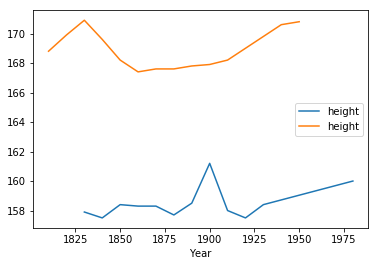

In [9]:
ax = vnm.plot(x='Year', y='height')
arg.plot(ax=ax, x='Year', y='height')

On average, people in Argentina are taller than those in Vietnam. As noted above, these data have simlilar range, variance, and standard deviation.

# Exercise 2

2. What are the average heights every year?

__Assumption__: what is the worldwide average of heights per year?

In [10]:
for year in df.sort_values(by='Year').Year.unique():
    print(year, df[df.Year == year].height.mean())

1810 165.14857142857142
1820 165.57500000000002
1830 165.47241379310344
1840 164.26097560975614
1850 165.38163265306125
1860 165.57966101694913
1870 165.9902777777778
1880 165.95624999999995
1890 166.1378048780488
1900 166.6325581395349
1910 166.90875
1920 167.22705882352943
1930 167.5538461538461
1940 168.90277777777777
1950 169.77582417582414
1960 170.82808988764046
1970 171.08522727272728
1980 170.65376344086022


# Exercise 3

3. How spread out are the heights between countries?

__Assumption__: How spread out are the averages of all heights available for each country?


In [11]:
a = pd.DataFrame([[code, df[df.Code == code].height.mean()] for code in df.Code.unique()],
                 columns=['Code', 'Height'])
a.head()

,Code,Height
0,AFG,166.966667
1,ALB,169.700000
2,DZA,168.000000
3,AGO,166.700000
4,ARG,168.940000


In [12]:
print('Range:', a.Height.max() - a.Height.min())
print('Variance:', a.Height.var())
print('Std deviation:', a.Height.std())
a.Height.quantile([0.25,0.5,0.75])

Range: 18.360000000000014
Variance: 11.755793852678291
Std deviation: 3.4286723163169577


0.25    166.009028
0.50    168.039231
0.75    169.537500
Name: Height, dtype: float64

# Exercise 4

4. What is the distribution of countries heights over time?  Does the spread grow larger as you move forward in the arrow of time?  Or smaller? (use the center and spread to talk about this)

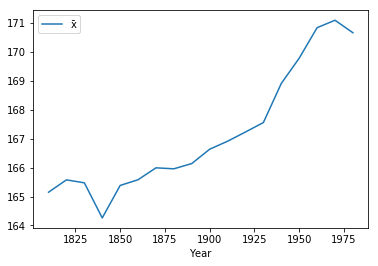

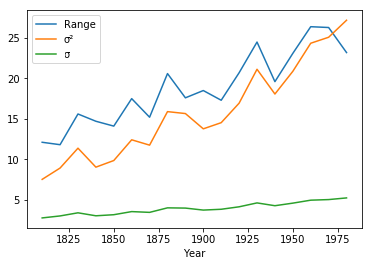

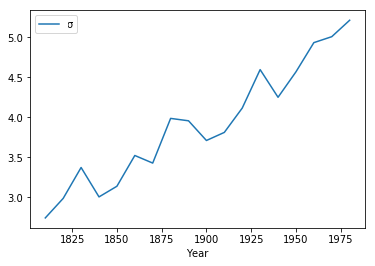

In [23]:
df2 = pd.DataFrame([[year,
                     df[df.Year == year].height.mean(),
                     df[df.Year == year].height.max() - df[df.Year == year].height.min(),
                     df[df.Year == year].height.var(),
                     df[df.Year == year].height.std()]
                    for year in df.sort_values(by='Year').Year.unique()],
                   columns=['Year', 'x̄', 'Range', 'σ²', 'σ'])

df2.plot(x='Year', y='x̄')
df2.plot(x='Year', y=['Range', 'σ²', 'σ'])
df2.plot(x='Year', y='σ')